# Importando bibliotecas e lendo arquivos

In [205]:
import pandas as pd
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np

In [80]:
tabela = pd.read_csv('campeonato-brasileiro-full.csv')

In [81]:
# Limpanda o dataframe
del tabela['formacao_mandante']
del tabela['formacao_visitante']
del tabela['tecnico_mandante']
del tabela['tecnico_visitante']
del tabela['arena']

# Distribuição geométrica

In [155]:
# Lista com todos os participantes
times = []

for x in tabela['mandante']:
    if x not in times:
        times.append(x)

times

['Guarani',
 'Athletico-PR',
 'Flamengo',
 'Goias',
 'Internacional',
 'Criciuma',
 'Juventude',
 'Fortaleza',
 'Cruzeiro',
 'Vitoria',
 'Santos',
 'Corinthians',
 'Fluminense',
 'Atletico-MG',
 'Coritiba',
 'Gremio',
 'Bahia',
 'Figueirense',
 'Paysandu',
 'Ponte Preta',
 'Parana',
 'Sao Caetano',
 'Sao Paulo',
 'Vasco',
 'Botafogo-RJ',
 'Palmeiras',
 'Brasiliense',
 'Santa Cruz',
 'America-RN',
 'Sport',
 'Nautico',
 'Ipatinga',
 'Portuguesa',
 'Avai',
 'Santo Andre',
 'Barueri',
 'Atletico-GO',
 'Ceara',
 'Gremio Prudente',
 'America-MG',
 'Chapecoense',
 'Joinville',
 'CSA',
 'Bragantino',
 'Cuiaba']

In [138]:
# Criando dicionário com as probabilidades de vitórias de todos os times
todos = {}

for time in times:
    todos[time] = round(len(tabela[tabela['vencedor'] == time]) / (len(tabela[tabela['mandante'] == time]) + len(tabela[tabela['visitante'] == time])), 3)

todos

{'Guarani': 0.277,
 'Athletico-PR': 0.398,
 'Flamengo': 0.429,
 'Goias': 0.362,
 'Internacional': 0.437,
 'Criciuma': 0.298,
 'Juventude': 0.297,
 'Fortaleza': 0.335,
 'Cruzeiro': 0.44,
 'Vitoria': 0.311,
 'Santos': 0.422,
 'Corinthians': 0.423,
 'Fluminense': 0.392,
 'Atletico-MG': 0.416,
 'Coritiba': 0.328,
 'Gremio': 0.421,
 'Bahia': 0.296,
 'Figueirense': 0.324,
 'Paysandu': 0.306,
 'Ponte Preta': 0.315,
 'Parana': 0.335,
 'Sao Caetano': 0.378,
 'Sao Paulo': 0.45,
 'Vasco': 0.332,
 'Botafogo-RJ': 0.348,
 'Palmeiras': 0.444,
 'Brasiliense': 0.238,
 'Santa Cruz': 0.197,
 'America-RN': 0.105,
 'Sport': 0.313,
 'Nautico': 0.284,
 'Ipatinga': 0.237,
 'Portuguesa': 0.272,
 'Avai': 0.248,
 'Santo Andre': 0.289,
 'Barueri': 0.316,
 'Atletico-GO': 0.271,
 'Ceara': 0.271,
 'Gremio Prudente': 0.184,
 'America-MG': 0.279,
 'Chapecoense': 0.264,
 'Joinville': 0.184,
 'CSA': 0.211,
 'Bragantino': 0.333,
 'Cuiaba': 0.263}

In [147]:
# Função que calcula, em média, quantos jogos são necessários até a primeira vitória
def previsao(x):
    distribuicao = geom(x)
    media = distribuicao.mean()
    return round(media, 0)

In [161]:
equipes = ['Corinthians', 'Palmeiras', 'Santos', 'Gremio', 'Cruzeiro',
          'Flamengo', 'Vasco', 'Cuiaba', 'Atletico-MG', 'Botafogo-RJ',
          'Athletico-PR', 'Bahia', 'Sao Paulo', 'Fluminense', 'America-MG',
          'Bragantino', 'Coritiba', 'Goias', 'Fortaleza', 'Internacional']

In [162]:
# Dicionário, com todos os times, da média de jogos até a primeira vitória 
esp = {}
for time, valor in todos.items():
    esp[time] = previsao(valor)

# Dicionário só com os participantes desse ano
esp = {chave: valor for chave, valor in esp.items() if chave in equipes}
esp

{'Athletico-PR': 3.0,
 'Flamengo': 2.0,
 'Goias': 3.0,
 'Internacional': 2.0,
 'Fortaleza': 3.0,
 'Cruzeiro': 2.0,
 'Santos': 2.0,
 'Corinthians': 2.0,
 'Fluminense': 3.0,
 'Atletico-MG': 2.0,
 'Coritiba': 3.0,
 'Gremio': 2.0,
 'Bahia': 3.0,
 'Sao Paulo': 2.0,
 'Vasco': 3.0,
 'Botafogo-RJ': 3.0,
 'Palmeiras': 2.0,
 'America-MG': 4.0,
 'Bragantino': 3.0,
 'Cuiaba': 4.0}

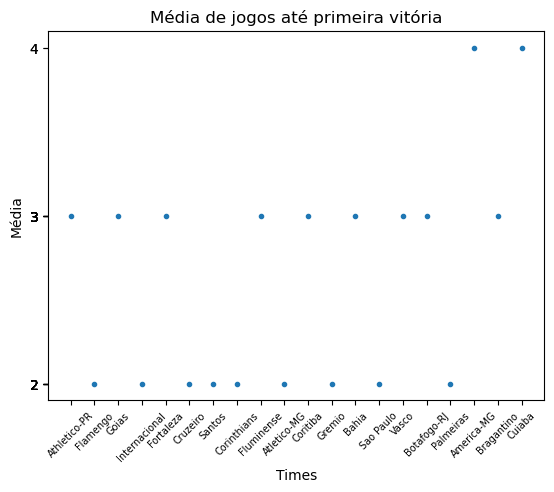

In [184]:
# Gráfico
x = list(esp.keys())
y = list(esp.values())

plt.scatter(x, y, marker='.') 
plt.xlabel('Times') 
plt.ylabel('Média')
plt.title('Média de jogos até primeira vitória')
plt.xticks(rotation=45, fontsize=7)
plt.yticks(y)
plt.savefig('Distribuição geométrica.png', dpi=300)
plt.show()

In [211]:
distribuicao = {'-2': '5/20',
                '-1': '6/20',
               '0': '5/20',
               '1': '2/20',
               '3': '1/10',
               '10': '1/10'}

distribuicao

{'-2': '5/20',
 '-1': '6/20',
 '0': '5/20',
 '1': '2/20',
 '3': '1/10',
 '10': '1/10'}

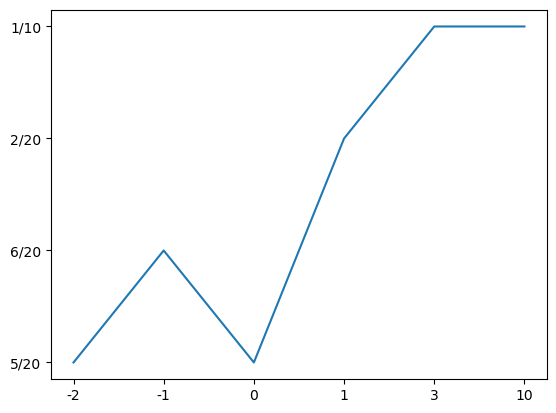

In [212]:
x2 = list(distribuicao.keys())
y2 = list(distribuicao.values())
plt.plot(x2, y2)
plt.show()